In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/nlp_liflow/

/content/drive/My Drive/nlp_liflow


In [3]:
!ls

자연어처리_1.ipynb		  item_all_doc2vec_k-means.csv
자연어처리_2.ipynb		  item_all_GloVe_DBSCAN.csv
all_df_with_tokens.csv		  item_all_glove_k-means.csv
all_sen.csv			  ko.bin
cc.ko.300.bin.gz		  list_to_csv.csv
df_all				  nlp_tokenizer.ipynb
df_all.csv			  스포츠_sen.csv
df_all_GloVe.csv		  sen.csv
df_all_tfidf.csv		  sen_preprocessig.csv
doc2vec_100.model		  스포츠_sen_prerprocessing.csv
feature.pkl			  sentence_Summarizer.ipynb
feature.pkl.mtx			  textrank
first_embedding_clustering.model  textrank_git
glove_model_100.model		  tfidftransformer.pkl
glove_model.model		  자연어처리_tomotopy_HDPModel.ipynb
glove_word_dict_128.pickle	  자연어처리_tomotopy.ipynb
item_1.csv			  자연어처리_tomotopy_modeling.ipynb
item_all_최종.csv		  vectorizer.pkl
item_all.csv			  word2vec_model


In [4]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-12-05 01:57:53--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-12-05 01:57:53--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc25485badcfb4e9a136931fb54d.dl.dropboxusercontent.com/cd/0/get/ByB3FC6GbiLfxrioduTifx6WKgyjCgkVTrdMUNfvRn5ojwj53IqdLgnw_fymjHSx7iLw4TY02IL0XzHXM9rwW04W3wM73VqpQXfbbMc69Y8xxoOu_gqpVtghVV1Dr_hufbeNwsH1k4-X6tp8majhua18euJxMJzZOI21-UmnT9NqYPXx-G9DnpCb14Ca1nPjU3o/file?dl=1# [following]
--2022-12-05 01:57:53--  https://uc25485badcfb4e9a136931fb54d.dl.dropboxusercontent.com/cd/0/get/ByB3FC6GbiLf

In [5]:
!pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.4 MB 1.2 MB/s 
     |████████████████████████████████| 131 kB 48.0 MB/s 
  Created wheel for kss: filename=kss-3.7.3-py3-none-any.whl size=42449195 sha256=66e979e1981caa81bd351ce8cfabf193277d6f4232fbd12b59ccf3ab75899e94
  Stored in directory: /root/.cache/pip/wheels/21/ae/be/1795119115db76f9824f02c419582c5c14dc4a6e8f144337a2
Successfully built kss


In [6]:
import textrank_git
from textrank_git import rank
from textrank_git import sentence
from textrank_git import summarizer
from textrank_git import utils
from textrank_git import word
import re
import kss
import pandas as pd
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim import models
import gensim
import logging
import os
from collections import namedtuple, defaultdict
from collections.abc import Iterable
from timeit import default_timer
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from numpy import zeros, float32 as REAL, vstack, integer, dtype
import numpy as np
from gensim import utils, matutils  # utility fnc for pickling, common scipy operations etc
from gensim.utils import deprecated
from gensim.models import Word2Vec # noqa: F401
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
main_df = pd.read_csv('all_df_with_tokens.csv',index_col = 0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
main_df['convrsThema'] = main_df['convrsThema'].str.replace('코로나/생활', '투병')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('메르스', '투병')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('축구선수', '축구')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 문학 ', '책')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('독서', '책')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('문학', '책')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('집값', '부동산')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('분양', '부동산')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('직업', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('좋은글,사자성어,좋은글귀,등등 읽으면 도움이되는 글들..', '좋은글')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('국제관계', '정치')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('제테크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('시사/재테크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 경제/재테크 ', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 경제/재태크 ', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 자연/휴양지 ', '자연/여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자동차보험', '교통사고/보험')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('교통사고', '교통사고/보험')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('운전', '자동차')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 자동차 ', '자동차')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀취업', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀직장', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀입대', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀교육', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀결혼', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀 취업', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀 교육', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀 결혼', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일상생활', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일상 이야기', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일상대화', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('#일상', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('이사', '이사/이민')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('이민', '이사/이민')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('먹거리', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('먹거리/건강', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 먹거리 ', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('육아', '육아')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('양육/교육', '육아')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('교육', '교육')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('운동', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 스포츠/레저 ', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영화관', '영화관')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 영화 ', '영화')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('연예인', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 방송/연예 ', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 연애/결혼 ', '연애')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여행계획', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여가생활', '여가')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('시댁살이', '시집살이')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('시댁', '시집살이')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('말씀나누기', '대화')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 만화 ', '만화')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('결혼생활', '결혼')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('남편', '결혼')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강/다이어트', '다이어트')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 건강/다이어트 ', '다이어트')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('노후준비', '노후')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('노후대책', '노후')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('넷플릭스', '방송')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('TV', '방송')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('드라마', '방송')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 군대 ', '군대')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강/교육', '건강')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('가족건강', '건강')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('가정', '가족')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('#인생', '인생')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('반려동물,강아지', '반려동물')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 국가/지역 ', '국가/지역')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 게임 ', '게임')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강식', '건강식품')

main_df['convrsThema'] = main_df['convrsThema'].str.replace('수영', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('볼링', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('축구', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('야구', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('배구', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('골프', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('직장상', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('#직장상', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('직장화', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('피시방', '게임')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('요리', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('밥', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강식품품', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강식품', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('식습관', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('음식점', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('음식/건강', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영양제', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('제주도', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('휴양지', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('등산', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('캠핑', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여가', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('게읻트볼', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자전거', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('스쿠버다이빙', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('해외여행', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강검진', '건강')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('연애/결혼', '연애')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('육아', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('스포츠/레저', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('재태크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('부동산', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('경제', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('아파트', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('재개발', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('돈', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('경제/재테크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('방송', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영화', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영화관', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('방송/연예/연예', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('책', '교육')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('교통사고/보험/보험', '교통사고/보험')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자동차면허', '자동차')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('벌초', '제사')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('장례', '제사')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('학창시절', '친구')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('스포츠/레저', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여행/건강', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여행/자녀', '자녀')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
import operator
files = main_df.loc[operator.or_(main_df['colctUnitCode']=="음성수집 도구" , main_df['colctUnitCode']=="스튜디오"), ]

In [ ]:
files = files.loc[files['convrsThema']=="스포츠", "sentence"]

In [7]:
mecab = Mecab()

def tokenizer(raw, pos=["NNG","NNP","VV","VA"]): 
  return [word for word, tag in mecab.pos(raw) if len(word) > 1 and tag in pos]

def duplicate_drop(df):
  df_a = df.apply(lambda a : tokenizer(a))
  df_a= df_a.drop_duplicates(keep='first')
  idx = df_a.index
  return df.loc[idx]

def preprocessing(sents):
  remain_pattern = re.compile(r'\([^)]*\)')
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

  ws_replace = re.sub(r'\xa0', r'', sents)
  text_rm = remain_pattern.sub(r'', ws_replace)
  text = hangul.sub(r'', text_rm)
      
  return text

def whitespace_drop(sents):
  sents = sents.replace(" ","")

  return sents

In [ ]:
files = files.apply(lambda a : preprocessing(a))
files_wsd = files.apply(lambda a : whitespace_drop(a))
files_wsd = files_wsd.drop_duplicates(keep='first')
idx = files_wsd.index
files = files.loc[idx]
files = duplicate_drop(files)
files

122785     어제 탁구 시합할 때 그 빽 서브 넣을 때 그렇게 연습을 안 하고 하니까
122786                          그게 잘 들어가던데 빽 서브 넣는데
122787                          그것도 연습을 좀 많이 해야겠더라고
122788                       조금 하다 보니까 공이 막 뜨고 그러니까
122789              상대방이 때리고 나니까 쫌 그것도 안 좋기는 안 좋더라고
                            ...                    
316457    나도 배드민턴 해봤지만  배드민턴 채 하나에  기본적으로 최소 이십만원이야
316458       탄성이 다르거든 하다 보면 운동이라는 것이  욕심이라는 것이 생기잖아
316459         아무튼 스포츠가 됐든 레저가 됐든 뭐든지 너무 과하게  하다 보면
316596    왜 한국에 와서 그렇게  했느냐고 물었을 때 그냥 고개를 돌렸다고 하더라고
316627        이름이 잘 알려진 메시보다 잘하니까 흔히  신계라고 말하기는 하지만
Name: sentence, Length: 4821, dtype: object

# 전처리 파일 가져오기

In [8]:
files = pd.read_csv('item_all_최종.csv',index_col = 0)
files = files['convrs']
files

3027                      수영 끝나고 마이산을 한번 같이 등산하러 가보자고
3574            같은 실내 게임처럼  우리가 생각하는 게 변화가 되고 있다는 얘기지
4176               같이 다니는 사람들이 길게 보고 다니라고 그런 얘기를 하더라고
3247                              것 같고 벌써 건강해진 느낌이 들어
4607                      경험했던 스포츠 중에 제일 기억에 남는 것이 있니
                            ...                      
1383    휴일에  시간 날 때 시간을 온통 거기에 쏟아부어야 되니까 가정을 좀 등한시하겠지
3158      휴일에 대해서 얘기를 하는 것이  기억 속에서 꺼내며 말할 수 있어서 참 좋다
3970    희노애락을 딱 갖는 거기에서 이제 프로야구가 상당히 우리에게 기여를 했다고 봐야죠
1696      히딩크 감독 밑에 배워서 가지고  그냥 체력 키우고 지구력 키워서 나간 거였어
1631          히딩크도 마찬가지고 스타가 되기 힘들지만  삼박자가 맞아야 된다는 거지
Name: convrs, Length: 3659, dtype: object

# Doc2Vec

In [9]:
token = []
convrs = []
for i in files:
  convrs.append(i)
  token.append(tokenizer(i))

In [10]:
common_texts_and_tags = [
    (text, [f"convrs_{i}",]) for i, text in enumerate(token)
]
'''
for text, tags in common_texts_and_tags:
    print(f"tags: {tags}, text: {text}")
'''
TRAIN_documents = [TaggedDocument(words=text, tags=tags) for text, tags in common_texts_and_tags]
docvecmodel = Doc2Vec(TRAIN_documents, vector_size=100, alpha = 0.025, epochs = 100, window=5, min_count=1, workers=4)

#모델 저장하기     
docvecmodel.save('doc2vec_100.model')

doc_vec_100 = pd.DataFrame(columns=['tag','text','trained_vector','convrs'])

# document의 vector를 구하는 방법은, 기 학습된 docvec을 가져오거나, 해당 단어를 넣고 다시 예측하는 것. 
for (text, tags),convrs in zip(common_texts_and_tags, convrs):
    trained_doc_vec = docvecmodel.docvecs[tags[0]]
    test_doc_vec = docvecmodel.infer_vector(text) #같은 문서를 모델에 다시 넣어서 옳게 임베딩을 진행했는지 확인해보기
    new_row = pd.DataFrame([[tags, text, trained_doc_vec, convrs]], columns = doc_vec_100.columns)
    doc_vec_100 = pd.concat([doc_vec_100, new_row], ignore_index = True)
    print(f"tags: {tags}, text: {text}")
    print(f"trained_doc_vec: {trained_doc_vec}")
    print(f"inferred_doc_vec: {test_doc_vec}")
    print("--"*20)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  0.22458847  0.11911923  0.12615749  0.06734535  0.16674016 -0.02319828
 -0.01734895  0.04645571 -0.07872801 -0.14191219 -0.08768111 -0.04577142
  0.25138602  0.03306558  0.05131995  0.08710723  0.17959441  0.16563383
  0.0108121   0.07772335  0.06585272 -0.00917227 -0.11556182  0.098365
 -0.0023291  -0.03300675  0.04976961 -0.05460571 -0.00054225 -0.20373161
  0.08890716  0.05142045 -0.00419574  0.0259922   0.17769663 -0.10021574
  0.16094996  0.22083034  0.04262426  0.05324667 -0.03339035  0.1297312
 -0.07210286  0.17970347 -0.02087438 -0.01612813 -0.09379394  0.17559929
  0.04153962  0.1124544   0.00068731 -0.0194704   0.12484981 -0.00821599
 -0.10048669 -0.13486841  0.1875608  -0.10261315  0.00532771  0.09160815
  0.000984    0.03667652 -0.16879748  0.19608751  0.12828144  0.11810656
  0.02358356  0.16514198 -0.0268061  -0.00848325 -0.1421985   0.00915642
  0.05963904 -0.10983344 -0.14322959 -0.12549321 -0.25306034  0.03670397
  0.22083738  0.11

In [11]:
feature=[]
for i in range(0,40):
    a = "feature"+str(i)
    feature.append(a)
# 1500 개의 주성분으로 차원 축소
pca = PCA(n_components= 40) 
printcipalComponents = pca.fit_transform(docvecmodel.docvecs.vectors_docs)

principalDf = pd.DataFrame(data=printcipalComponents, columns = feature)
print(sum(pca.explained_variance_ratio_))

0.9841249782475643


In [12]:
principalDf

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39
0,-0.313966,-0.241574,-0.112941,-0.084679,-0.212769,0.138024,0.035446,0.124691,-0.013154,-0.013836,...,-0.015867,-0.043380,-0.079353,-0.002185,0.028639,-0.008034,0.015461,-0.019407,0.006819,0.011811
1,0.318773,0.487115,-0.502351,0.113086,-0.079052,-0.323379,0.087203,-0.174609,0.123442,-0.185918,...,-0.028990,-0.015191,0.012433,-0.017342,0.023907,0.069743,0.012685,0.037191,0.002175,0.021210
2,-0.246113,0.274699,-0.121539,-0.032771,-0.215517,-0.161510,-0.188051,0.253907,0.114334,-0.208662,...,0.025710,0.017390,-0.018057,-0.006711,-0.018550,0.040176,0.023442,-0.005466,0.005478,-0.008872
3,-0.114885,-0.213155,-0.081478,0.094873,-0.141709,0.171820,-0.182477,-0.090290,-0.034889,0.144823,...,-0.025307,-0.025816,-0.022259,-0.005660,-0.007092,-0.016829,-0.023565,-0.011665,-0.005481,0.002572
4,0.150435,0.381960,-0.165428,-0.251283,-0.135176,0.015956,0.033872,-0.406278,-0.040584,0.054814,...,-0.002753,-0.041284,0.025707,0.007850,-0.003213,0.000529,-0.024987,-0.006528,0.028038,-0.014697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,-0.343898,-0.158294,-0.344096,0.040269,-0.280363,0.301774,-0.010386,0.127747,-0.136517,-0.119177,...,0.003133,-0.014782,0.005228,-0.004747,0.011249,0.030700,0.018797,-0.037045,0.000752,-0.015923
3655,0.058768,0.393069,-0.313123,-0.205455,-0.360743,0.056443,-0.072115,0.026432,0.044427,-0.274744,...,-0.005135,-0.003227,-0.024193,-0.007552,0.032503,0.009371,-0.010527,0.004064,0.021893,-0.019629
3656,0.597904,0.047385,-0.228824,-0.275792,0.348127,0.322183,-0.000883,0.123245,0.043865,-0.095170,...,-0.026105,-0.001448,-0.010400,-0.018175,-0.013462,0.016195,-0.009676,-0.009326,0.010925,-0.012977
3657,0.075260,-0.004353,0.751019,0.177557,-0.379744,-0.331386,-0.559893,-0.158711,-0.288435,-0.408452,...,0.057880,0.003296,-0.014317,-0.003736,-0.021380,0.008498,0.041219,0.018597,-0.008283,-0.021102


In [13]:
doc_vec_100

,tag,text,trained_vector,convrs
0,[convrs_0],"[수영, 마이산, 등산]","[-0.12667221, -0.105979435, 0.0010843091, 0.04...",수영 끝나고 마이산을 한번 같이 등산하러 가보자고
1,[convrs_1],"[실내, 게임, 생각, 변화, 얘기]","[-0.28655052, -0.11851097, 0.10047133, 0.09546...",같은 실내 게임처럼 우리가 생각하는 게 변화가 되고 있다는 얘기지
2,[convrs_2],"[다니, 사람, 다니, 얘기]","[-0.17123596, -0.021336135, 0.060790747, 0.103...",같이 다니는 사람들이 길게 보고 다니라고 그런 얘기를 하더라고
3,[convrs_3],"[건강, 느낌]","[-0.14373639, -0.088472106, -0.059342787, 0.15...",것 같고 벌써 건강해진 느낌이 들어
4,[convrs_4],"[경험, 스포츠, 기억]","[-0.2376065, -0.1377311, -0.14893514, 0.082106...",경험했던 스포츠 중에 제일 기억에 남는 것이 있니
...,...,...,...,...
3654,[convrs_3654],"[휴일, 시간, 시간, 가정, 등한시]","[-0.13001497, 0.025228575, -0.13633788, 0.1139...",휴일에 시간 날 때 시간을 온통 거기에 쏟아부어야 되니까 가정을 좀 등한시하겠지
3655,[convrs_3655],"[휴일, 얘기, 기억, 꺼내]","[-0.21074995, -0.051796414, -0.05341527, 0.118...",휴일에 대해서 얘기를 하는 것이 기억 속에서 꺼내며 말할 수 있어서 참 좋다
3656,[convrs_3656],"[희노애락, 프로, 야구, 기여]","[-0.352075, -0.006339219, -0.10775676, 0.22541...",희노애락을 딱 갖는 거기에서 이제 프로야구가 상당히 우리에게 기여를 했다고 봐야죠
3657,[convrs_3657],"[히딩크, 감독, 체력, 키우, 지구력]","[0.058611006, 0.11865454, 0.2670997, -0.064303...",히딩크 감독 밑에 배워서 가지고 그냥 체력 키우고 지구력 키워서 나간 거였어


In [14]:
# 2차원으로 축소
n_components = 2

# t-SNE 모델 생성
tsne = TSNE(n_components = n_components)

# 학습한 결과 2차원 공간값 출력
tsnedata = tsne.fit_transform(principalDf)

print(tsnedata)
column = ['x', 'y']
tsnedata = pd.DataFrame(tsnedata, columns = column)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-29.444876 -53.71529 ]
 [ 46.61054  -22.716919]
 [-20.418833 -50.64104 ]
 ...
 [ 50.576157   9.054509]
 [ 70.56871   34.09342 ]
 [ 67.8261    33.75894 ]]


# DF 정의


In [ ]:
df = pd.DataFrame(columns = [str(i) for i in range(100)])
for i in doc_vec_100['trained_vector']:
  df = df.append(pd.Series(i, index=df.columns), ignore_index=True)  #100차원 값

In [ ]:
df = tsnedata #pca -> 2차원 축소 값

In [ ]:
df = principalDf #pca n차원 축소 값

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
dbscan = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
# create model and prediction
dbscanmodel = DBSCAN(eps=3, min_samples= 10)#적어도 10개의 샘플이 모여야 한 군집으로
dbscanmodel.fit(dbscan)
doc_vec_100['cluster'] = dbscanmodel.fit_predict(dbscan)
result = dbscanmodel.fit_predict(dbscan)
doc_vec_100

,tag,text,trained_vector,convrs,cluster
0,[convrs_0],"[수영, 마이산, 등산]","[0.1653082, 0.10958114, -0.079088986, -0.03524...",수영 끝나고 마이산을 한번 같이 등산하러 가보자고,-1
1,[convrs_1],"[실내, 게임, 생각, 변화, 얘기]","[0.18045685, 0.0550259, -0.106633924, -0.09032...",같은 실내 게임처럼 우리가 생각하는 게 변화가 되고 있다는 얘기지,-1
2,[convrs_2],"[다니, 사람, 다니, 얘기]","[0.11662559, 0.055082224, 0.047172364, -0.0327...",같이 다니는 사람들이 길게 보고 다니라고 그런 얘기를 하더라고,-1
3,[convrs_3],"[건강, 느낌]","[0.078119636, 0.081583165, -0.06546769, -0.064...",것 같고 벌써 건강해진 느낌이 들어,-1
4,[convrs_4],"[경험, 스포츠, 기억]","[0.09372773, 0.016877063, -0.1424199, -0.06613...",경험했던 스포츠 중에 제일 기억에 남는 것이 있니,-1
...,...,...,...,...,...
3654,[convrs_3654],"[휴일, 시간, 시간, 가정, 등한시]","[0.09517644, 0.13484032, -0.025526356, -0.0999...",휴일에 시간 날 때 시간을 온통 거기에 쏟아부어야 되니까 가정을 좀 등한시하겠지,-1
3655,[convrs_3655],"[휴일, 얘기, 기억, 꺼내]","[0.20471227, 0.0980326, -0.03324793, -0.091038...",휴일에 대해서 얘기를 하는 것이 기억 속에서 꺼내며 말할 수 있어서 참 좋다,-1
3656,[convrs_3656],"[희노애락, 프로, 야구, 기여]","[-0.034825448, 0.13837552, -0.3587115, -0.0010...",희노애락을 딱 갖는 거기에서 이제 프로야구가 상당히 우리에게 기여를 했다고 봐야죠,-1
3657,[convrs_3657],"[히딩크, 감독, 체력, 키우, 지구력]","[-0.036557678, 0.024886828, 0.12324259, 0.0488...",히딩크 감독 밑에 배워서 가지고 그냥 체력 키우고 지구력 키워서 나간 거였어,-1


In [ ]:
count = 0
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = doc_vec_100[doc_vec_100['cluster'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['convrs']:
            print(title) 
            count+=1
        print()

print(count)


cluster num : 1
왜냐하면 탁구를 이렇게 치면은 치매도 좋다고 하고 뭐든게 다 좋다고
그렇게 해서 그냥 탁구를 못 치는데 그냥 계속 칠라고
시골에 가서 일도 좀 하고 주중에는 탁구도 치고 하는 게 좋은 거 같애
그 볼은 받으려면 그런데 탁구는 그래도 그 반경이 좀 좁잖아
나는 운동을 안 해 봤지만 안 해 보고 탁구를 배웠거든
우리 탁구 치는 날까지 그래 우리는 우정을 변치말자
다 탁구가 좋아서 모이고 하는 거라 다 사람들이 다 순하고 좋은 거 같애
나는 이게 탁구를 못 쳐서 자신감이 없어
다들 바쁘겠지 그렇지만 그래도 탁구가 좋아서 오는 사람들이잖아
탁구는 이게 좁은 공간에서 그걸 넣는다는게 힘든 거 같아 내가 보니까
나도 이렇게 테레비나 이렇게 탁구 저기한 사람들 이렇게 봤어
다들 바쁘겠지 바쁘겠지만 그래도 탁구가 좋아서 오는 사람들이 잖아
나도 이렇게 텔레비나 이렇게 탁구 저기한 사람들 이렇게 봤어
집에서 심심하면 우리 탁구나 한번 칠까 나가서 탁구 한번 치면 몸두 개운하고
내가 계속 바쁘다고  창피할까 봐 안 가는 거야  
 하는 것보다는 구경하는 쪽을 많이 하고 탁구도 많이 쳤던 거 같아요
우리  탁구장이 있거든 가서 가족들이랑 탁구를 많이 치거든
직접적으로    탁구도 많이 쳤던 거 같아요
아까 탁구 얘기를 했는데  사실 탁구가 굉장히 전신에 좋은 운동이거든
나도 사십대 중반까지는 탁구를 치다가 안 쳤는데  다시 라켓을 샀어
근데 라켓을 샀는데도 남는 시간이 없어서 탁구를 안 치게 되더라고
그래서 나는 탁구 같은 운동도 전신운동이니까  한번씩 해도 될 것 같아
탁구는 가벼운 운동이니까  또 우리가 탁구를 제법 잘 하는 편에 속하잖아
탁구도 그냥 전신 운동 한다고 생각하면  가벼운 운동이 돼서 좋을 것 같아
나도 사십대 중반까지는 타구를 치다가 안 쳤는데  다시 라켓을 샀어
탁구로 예를 들자면 생각보다 탁구도 돈이 많이 들거든 한달에 십만원 정도래

cluster num : 2
그런데 뭐 처음부터 잘하는 사람은 없을 꺼 같애 그지
매일 서로 

In [ ]:
from sklearn import metrics
n_cluster = len(set(dbscanmodel.labels_))-(1 if -1 in dbscanmodel.labels_ else 0)
n_noise = list(dbscanmodel.labels_).count(-1)

print("클러스터 개수 : ", n_cluster)
print("노이즈 개수 : ", n_noise)
print("실루엣계수 : %.3f" %  metrics.silhouette_score(df, dbscanmodel.labels_, metric = 'euclidean'))
#print("completeness : %.3f" %  metrics.completeness_score(y, dbscanmodel.labels_))


클러스터 개수 :  18
노이즈 개수 :  3033
실루엣계수 : -0.213


# k-means

In [ ]:
df = tsnedata #pca -> 2차원 축소 값

############################################################
K-Means Clustering
############################################################


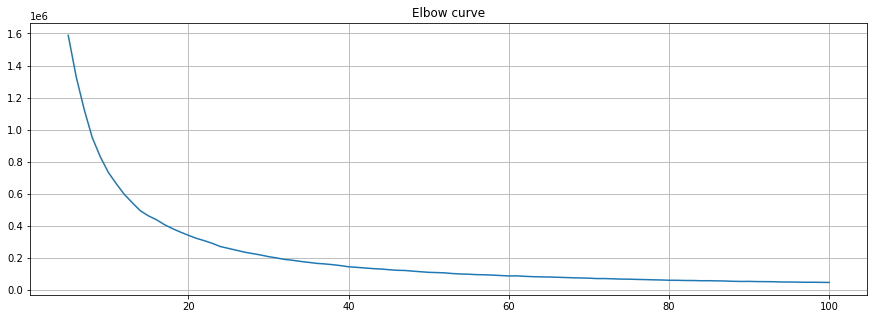

In [ ]:
from sklearn import preprocessing
print("##"*30)
print("K-Means Clustering")
print("##"*30)
# 시도해 볼 cluster 수
cluster_number = range(5,101)
distortions = []
processed_data = doc_vec_100.copy()
scaler = preprocessing.MinMaxScaler()
#scaler.fit_transform(docvecmodel.docvecs.vectors_docs)
scaler.fit_transform(df)

# 모델 학습
for k in cluster_number:
    Clustering_Method = KMeans(n_clusters=k, random_state = 0)
    #X = model.docvecs.vectors_docs 
    #Clustering_Method.fit(docvecmodel.docvecs.vectors_docs)
    Clustering_Method.fit(df)
    distortions.append(Clustering_Method.inertia_)
    
# Elbow Curve 시각화
fig = plt.figure(figsize=(15, 5))
plt.plot(cluster_number, distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [16]:
from math import*
def euclidean_distance(x, y):
    return sqrt(sum(pow(a - b, 2) for a, b in zip(x, y)))

In [67]:
from sklearn import preprocessing
Clustering_Method = KMeans(n_clusters=11, random_state=0)
X = docvecmodel.docvecs.vectors_docs # document vector 전체를 가져옴. 
#processed_data = tsnedata.copy()
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X)
Clustering_Method.fit(X)# fitting 
count = 0
#Clustering_Method.cluster_centers_
cluster_dict = {i:[] for i in range(0, 11)}
for text, label in zip(range(len(doc_vec_100)), Clustering_Method.labels_):
    a = []
    a.append(doc_vec_100['convrs'].loc[text])
    #a.append([doc_vec['tsne_x'].loc[text],doc_vec['tsne_y'].loc[text]])
    a.append([doc_vec_100['text'].loc[text]])
    a.append([doc_vec_100['trained_vector'].loc[text]])
    cluster_dict[label].append(a)
    

item_all_doc2vec = pd.DataFrame(columns = ['cluster','convrs','vec','distance','token'])
for (label, lst), y in zip(cluster_dict.items(),Clustering_Method.cluster_centers_):
    item = pd.DataFrame(columns = ['cluster','convrs','vec','distance','token'])
    print(f"Cluster {label}")
    for x in lst:
          token = str(x[1][0])
          vec = str(x[2][0])
          #print(x[2])
          #print(y)
          print(x[0])
          distance = euclidean_distance(x[2][0],y)
          new_df = pd.DataFrame({'cluster':label,
                                'vec': vec,
                                'token': token,
                                'convrs':x[0],
                                'distance': distance},index = [0])
          count+=1
          item = pd.concat([item,new_df], ignore_index = True)
    item = item.sort_values('distance')
    item_all_doc2vec = pd.concat([item_all_doc2vec, item], ignore_index = True)
    print("--"*30)
print(count)
print("##"*20)

Cluster 0
걔네들은 하루에 세네시간 운동을 하고  공부도 겸해서 해야 되는 거잖아
거리가 몸에 정확하게 맞아서  그렇게 정확한 거리를 알게 되려면
건강을 챙기다 보니까 하루에 한 삼십분씩 한시간씩 자전거를 타
건대 연습장 가서도 한시간을 친다면 삼사십분은 어프로치 연습을 해
결국 다음 주에 또 차를 뽑으려고 그러거든 어제 결국 결정은 못 했어
골프 치는 사람들은 그 목표를 달성해도 다음 목표를 향해서 가는 것 같아요
공이 종점에서 딱 거기 있을 때 때리니까 잘 들어가더라고
굉장히 기분 나쁠 수 있는 문제더라고  그거 기사 읽어 본 적 있어
그 다음에는 헬스장을 가야 되는데 여건이 안 맞으면 동동대고
그 친구가 자전거 타잖아 자전거 복장을 다 준비하고 타는데
그것도 문제지만  보면은 자전거 타는  있거든
그것도 문제지만 우리집 앞에 보면은 자전거 타는 사람들 있거든
그것도 실력이 없어서 그런가 공을 오는 거를 못 보겠더라 친구는 어때
그것도 연습을 좀 많이 해야겠더라고
그게 작심삼일이라서 하루 이틀하고 말거란 말이지 그러면 돈이 아깝잖아
그게 잘 들어가던데 빽 서브 넣는데
그날 해야할 일을 안 한 것 같은 느낌까지 들고 찝찝한 기분이 들어
그냥 내 짧은 식견으로는 그런 생각을 하게 되고  어쨌든 그게 한가지 문제잖아요
그다음 해 이천 십 팔년도에 그거를 이어서 기세를 갖고 가야 되는데 그러지를 못했어요
그다음에 가장 필요한 거부터 하나 딱 장만을 해서 일단은 배우는 거야
그다음에 승용차를 이용하기보다는 버스를 활용하면서 출퇴근을 하고요
그다음에는 둘레길 열심히 걷고  자연도 좀 보고 바닷길도 좀 걷고 그래
그다음해 이천 십팔년도에 그거를 이어서 기세를 갖고 가야 되는데  그렇지를 못했어요
그래도 교육을 시키긴 하더라고요 거리하고 그 다음 퍼팅 보는 거 정도 배워요
그래서 그걸 가지고 퍼팅 연습을 했던 것 같고  어프로치는 뭐 그냥 했어
그래서 나도 방금 그 자전거에 대해서 자세히 한번 이야기를 해보려고 했어
그래서 너무 기뻐서 끝나고 거의 한시간씩은 연습

In [68]:
item_all_doc2vec

,cluster,convrs,vec,distance,token
0,0,자기가 가진 실력이 십 이승이잖아 원래 목표를 이십승으로 세웠더라고,[-0.18340383 -0.01954586 0.07837263 0.137293...,0.260790,"['실력', '목표']"
1,0,그런 데 한 번 나가 보면 지더라도 되게 실력이 향상이 되거든,[-0.17565238 0.00170725 0.09702041 0.151678...,0.287732,"['실력', '향상']"
2,0,드라이브도 잘 맞았다가 또 안 맞았다가 하는데 칠수록 실력이 늘어나나 봐,[-2.03574076e-01 -2.15402097e-02 6.14514686e-...,0.307117,"['드라이브', '실력', '늘어나']"
3,0,그것도 문제지만 보면은 자전거 타는 있거든,[-0.13676076 -0.01756221 0.12063785 0.151456...,0.318992,"['문제', '자전거']"
4,0,그런데 같이 갑시다 같이 가서 연습합시다 이렇게 말한 사람은 아직 없어,[-0.16915102 -0.03047136 0.03646662 0.166312...,0.341580,"['연습', '사람']"
...,...,...,...,...,...
3654,10,좋은 자리는 선수한테 주고 감독은 불편한 좌석 타고 올 정도로 사랑한대,[ 0.00710497 0.21089898 0.29289073 0.019790...,1.060072,"['자리', '선수', '감독', '불편', '좌석', '정도', '사랑']"
3655,10,그리고 주변 사람들이랑 이야기를 하다 보면 농담 식으로 그래 이 전에 왜 감독 경질...,[-3.00504923e-01 -5.18389046e-02 3.35426599e-...,1.060374,"['주변', '사람', '이야기', '농담', '감독', '경질']"
3656,10,베트남에서 수상 총리 이름은 몰라도 박항서 이름은 안다고 그러더라,[-3.14362079e-01 1.40625268e-01 3.27865928e-...,1.061294,"['베트남', '수상', '총리', '이름', '박항서', '이름', '그러']"
3657,10,이번에 마에다가 삼회에 강판 당했어 감독이 올라가더니 강판 시키더라고,[ 7.25556351e-03 2.64674991e-01 3.17092955e-...,1.206961,"['이번', '강판', '감독', '올라가', '강판', '시키']"


In [57]:
item_all_doc2vec.drop(item_all_doc2vec[item_all_doc2vec['distance']>0.92].index, inplace = True)

In [69]:
item_all_doc2vec

,cluster,convrs,vec,distance,token
0,0,자기가 가진 실력이 십 이승이잖아 원래 목표를 이십승으로 세웠더라고,[-0.18340383 -0.01954586 0.07837263 0.137293...,0.260790,"['실력', '목표']"
1,0,그런 데 한 번 나가 보면 지더라도 되게 실력이 향상이 되거든,[-0.17565238 0.00170725 0.09702041 0.151678...,0.287732,"['실력', '향상']"
2,0,드라이브도 잘 맞았다가 또 안 맞았다가 하는데 칠수록 실력이 늘어나나 봐,[-2.03574076e-01 -2.15402097e-02 6.14514686e-...,0.307117,"['드라이브', '실력', '늘어나']"
3,0,그것도 문제지만 보면은 자전거 타는 있거든,[-0.13676076 -0.01756221 0.12063785 0.151456...,0.318992,"['문제', '자전거']"
4,0,그런데 같이 갑시다 같이 가서 연습합시다 이렇게 말한 사람은 아직 없어,[-0.16915102 -0.03047136 0.03646662 0.166312...,0.341580,"['연습', '사람']"
...,...,...,...,...,...
3654,10,좋은 자리는 선수한테 주고 감독은 불편한 좌석 타고 올 정도로 사랑한대,[ 0.00710497 0.21089898 0.29289073 0.019790...,1.060072,"['자리', '선수', '감독', '불편', '좌석', '정도', '사랑']"
3655,10,그리고 주변 사람들이랑 이야기를 하다 보면 농담 식으로 그래 이 전에 왜 감독 경질...,[-3.00504923e-01 -5.18389046e-02 3.35426599e-...,1.060374,"['주변', '사람', '이야기', '농담', '감독', '경질']"
3656,10,베트남에서 수상 총리 이름은 몰라도 박항서 이름은 안다고 그러더라,[-3.14362079e-01 1.40625268e-01 3.27865928e-...,1.061294,"['베트남', '수상', '총리', '이름', '박항서', '이름', '그러']"
3657,10,이번에 마에다가 삼회에 강판 당했어 감독이 올라가더니 강판 시키더라고,[ 7.25556351e-03 2.64674991e-01 3.17092955e-...,1.206961,"['이번', '강판', '감독', '올라가', '강판', '시키']"


In [75]:
inw = item_all_doc2vec.loc[item_all_doc2vec['cluster']==0]
inw[:30]

,cluster,convrs,vec,distance,token
0,0,자기가 가진 실력이 십 이승이잖아 원래 목표를 이십승으로 세웠더라고,[-0.18340383 -0.01954586 0.07837263 0.137293...,0.260790,"['실력', '목표']"
1,0,그런 데 한 번 나가 보면 지더라도 되게 실력이 향상이 되거든,[-0.17565238 0.00170725 0.09702041 0.151678...,0.287732,"['실력', '향상']"
2,0,드라이브도 잘 맞았다가 또 안 맞았다가 하는데 칠수록 실력이 늘어나나 봐,[-2.03574076e-01 -2.15402097e-02 6.14514686e-...,0.307117,"['드라이브', '실력', '늘어나']"
3,0,그것도 문제지만 보면은 자전거 타는 있거든,[-0.13676076 -0.01756221 0.12063785 0.151456...,0.318992,"['문제', '자전거']"
4,0,그런데 같이 갑시다 같이 가서 연습합시다 이렇게 말한 사람은 아직 없어,[-0.16915102 -0.03047136 0.03646662 0.166312...,0.341580,"['연습', '사람']"
5,0,근데 그렇게 비슷한 실력이 비슷한 사람들끼리 그렇게 치면 좋아 좋지,[-0.22635725 -0.03444278 0.09614773 0.134757...,0.341960,"['실력', '사람']"
6,0,전에는 내 실력에 문제가 있다고 생각하고 하루 종일 연습하기도 했어요,[-0.10901673 -0.04719778 0.17908302 0.160736...,0.354109,"['실력', '문제', '생각', '하루', '종일', '연습']"
7,0,시간을 아무리 친다 해도 느는 게 속도가 반복돼,[-6.3904248e-02 3.2425489e-02 -6.8942289e-04 ...,0.358334,"['시간', '속도', '반복']"
8,0,그래서 너무 기뻐서 끝나고 거의 한시간씩은 연습을 했던 것 같아,[-0.09560204 0.020361 -0.0434299 0.148066...,0.367408,"['끝나', '시간', '연습']"
9,0,클럽마다 몇 미터 몇 미터 다 해 놓고 연습을 엄청 많이 했거든,[-0.08161783 0.01797921 0.00502815 0.156797...,0.372772,"['클럽', '연습']"


In [60]:
for i in range(10):
  inw = item_all_doc2vec.loc[item_all_doc2vec['cluster']==i]
  # 조건에 맞는 행제거 (df)
  print(len(inw))


idx = item_all_doc2vec[item_all_doc2vec['cluster']==1].index
item_all_doc2vec = item_all_doc2vec.drop(idx)

idx = item_all_doc2vec[item_all_doc2vec['cluster']==8].index
item_all_doc2vec = item_all_doc2vec.drop(idx)

530
0
280
225
221
165
172
149
0
265


In [54]:
for i in range(10):
  inw = item_all_doc2vec.loc[item_all_doc2vec['cluster']==i]
  # 조건에 맞는 행제거 (df)
  print(len(inw))

542
0
289
246
231
170
181
160
0
278


In [61]:
item_all_doc2vec.to_csv('item_all_doc2vec_k-means.csv')